In [33]:
import os
import glob
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()

In [35]:
sql = ("""
SELECT 
    t.week, u.user_id
FROM
    songplays s
        JOIN
    users u ON s.user_id = u.user_id
        JOIN
    time t ON s.start_time = t.start_time
WHERE u.user_id IN (SELECT 
    u.user_id
FROM
    songplays s
        JOIN
    users u ON s.user_id = u.user_id
        JOIN
    time t ON s.start_time = t.start_time
GROUP BY u.user_id
HAVING COUNT(u.user_id) > 10)
ORDER BY t.week;
""")
dash1 = sqlio.read_sql_query(sql, conn)

In [36]:
sql = ("""
SELECT 
    t.week, u.gender
FROM
    songplays s
        JOIN
    users u ON s.user_id = u.user_id
        JOIN
    time t ON s.start_time = t.start_time
ORDER BY t.week;
""")
dash2 = sqlio.read_sql_query(sql, conn)

In [37]:
sql = ("""
SELECT 
    t.start_time
FROM
    songplays s
        JOIN
    time t ON s.start_time = t.start_time;
""")
dash3 = sqlio.read_sql_query(sql, conn)

Text(0.5,1,'Playsong Count')

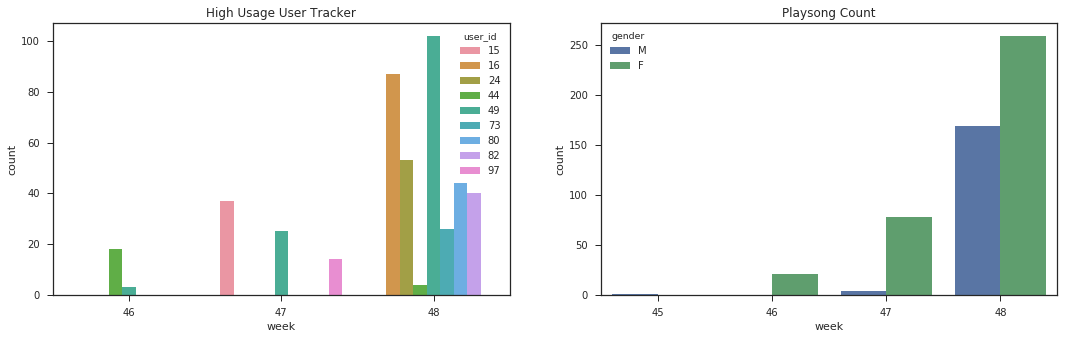

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))
sns.set(style="ticks")
sns.countplot(x="week", data=dash1, hue="user_id", ax=ax1)
ax1.set_title('High Usage User Tracker')
sns.countplot(x="week", data=dash2, hue="gender", ax=ax2)
ax2.set_title('Playsong Count')

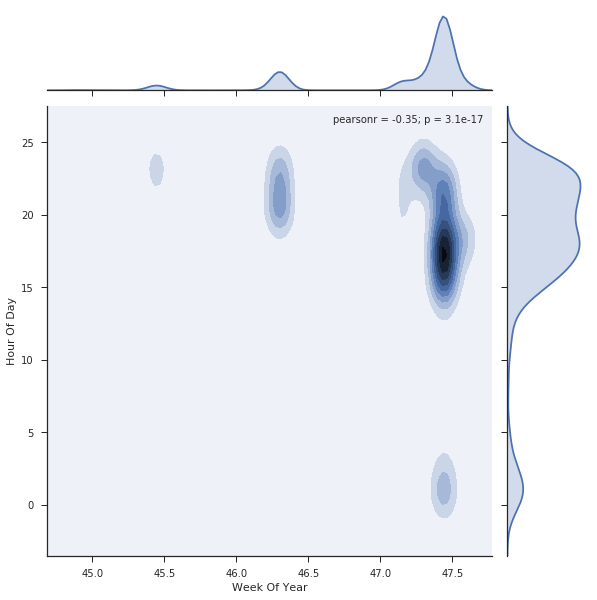

In [39]:
# Convert to datetime object
t = pd.to_datetime(dash3['start_time'], unit='ms')

# Build custom week of year and hour of day
x=(t.dt.dayofyear/365)*52
y=t.dt.hour + (t.dt.minute/60) + (t.dt.second/3600)

# Build df to allow custom labels on jointplot
data = pd.DataFrame({
    'Week Of Year': x,
    'Hour Of Day': y,
})

sns.jointplot(x='Week Of Year', y='Hour Of Day', data=data, kind='kde',size=8.5)

**Joint Plot:** 
Above plot shows a steady increase in the number of users as the service ages as well as an increase of usage through the day.

In [10]:
conn.close()